<a href="https://colab.research.google.com/github/Manith-2001/Projects/blob/main/Face_Emotion_Recognition2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.optimizers import RMSprop
import cv2
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


# **Extracting Data from uploaded Zipfile**

In [ ]:
from zipfile import ZipFile
file_name = 'archive.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Auto labelling Data**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255
)


train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 128
)


Found 28709 images belonging to 7 classes.


# **View the data**

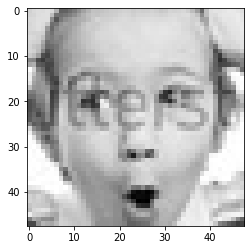

In [ ]:
img_array = cv2.imread('/content/train/surprise/Training_10073433.jpg')
plt.imshow(img_array)

# **Model**

In [ ]:
model = tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = tf.keras.layers.Dense(128, activation='relu')(base_output)
final_output = tf.keras.layers.Dense(64, activation='relu')(final_output)
final_output = tf.keras.layers.Dense(7, activation='softmax')(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
final_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
final_model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [ ]:
history = final_model.fit(
    train_generator,
    epochs = 15
)

Epoch 1/15
225/225 [==============================] - 219s 799ms/step - loss: 1.2511 - accuracy: 0.5284
Epoch 2/15
225/225 [==============================] - 182s 807ms/step - loss: 1.0081 - accuracy: 0.6244
Epoch 3/15
225/225 [==============================] - 181s 806ms/step - loss: 0.8938 - accuracy: 0.6666
Epoch 4/15
225/225 [==============================] - 181s 805ms/step - loss: 0.7963 - accuracy: 0.7082
Epoch 5/15
225/225 [==============================] - 182s 807ms/step - loss: 0.7106 - accuracy: 0.7407
Epoch 6/15
225/225 [==============================] - 182s 809ms/step - loss: 0.6239 - accuracy: 0.7709
Epoch 7/15
225/225 [==============================] - 181s 805ms/step - loss: 0.5490 - accuracy: 0.8026
Epoch 8/15
225/225 [==============================] - 181s 805ms/step - loss: 0.4812 - accuracy: 0.8257
Epoch 9/15
225/225 [==============================] - 182s 808ms/step - loss: 0.4217 - accuracy: 0.8490
Epoch 10/15
225/225 [==============================] - 181s 803m

# **Face Detection**

We have used haarcascade for face detection here. Face detection will be very useful if the model were to recognize emotions using a webcam however since this is a colab notebook I cannot use OpenCV to access my webcam

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2021-07-11 10:35:28--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-07-11 10:35:28 (21.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



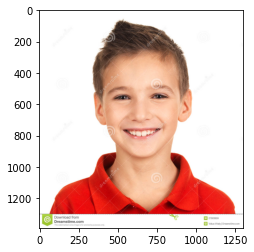

In [ ]:
base_image = cv2.imread('/content/happy boy.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

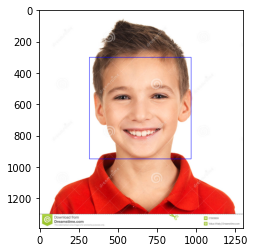

In [ ]:
test_image = cv2.imread('/content/happy boy.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     roi_gray = grey[y:y+h, x:x+w]
     roi_color = test_image[y:y+h, x:x+w]
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
     facess = face_cascade.detectMultiScale(roi_gray)
     if len(facess) == 0:
       print('face not detected')
     else:
       for (ex,ey,ew,eh) in facess :
         face_roi = roi_color[ey: ey+eh, ex: ex+ew]     
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

crop the image so that the model does not have to look at the background

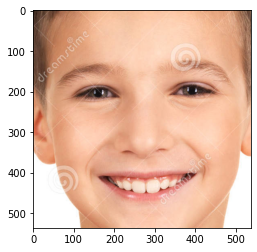

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

# **Categories**
0 - angry,
1 - disgust,
2 - fear,
3 - happy,
4 - neutral,
5 - sad, 
6 - surprise

In [ ]:
prediction = final_model.predict(final_image)
np.argmax(prediction)

3

In [ ]:
final_model.save('model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy','neutral', 'sad', 'surprise')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

OpenCV(4.1.2) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'



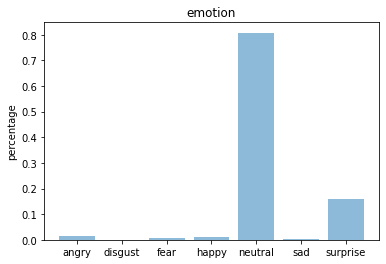

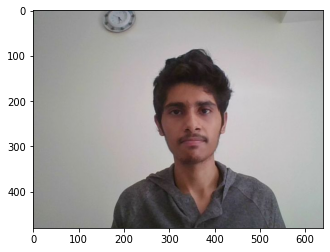

In [ ]:
import cv2
            
def facecrop(image):  
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')



plt.imshow(true_image)
plt.show()